In [1]:
import itertools
import copy
from typing import List, Dict, Tuple
from itertools import product
from typing import List, Dict, Tuple

# Importar tus módulos y clases
from accounting_templates import plantillas_contables_1
from utils import cargar_plantillas_cuentas
import classes as cl

import matplotlib.pyplot as plt


In [2]:
import search_loop as sl

In [4]:

# Ruta de la plantilla contable
ruta = r"C:\Users\andre\OneDrive\Documentos\Repositories\MIT_Tax_Avoidance\FTZ_Model\directorio_cuentas.xlsx"

# Cargar la plantilla contable
plantilla_1 = cargar_plantillas_cuentas(ruta)

In [8]:
### Instanciar Agentes de NCT y ZF
planta_NCT = cl.NCT("NCT", plantilla_1, plantillas_contables_1)
planta_ZF = cl.ZF("ZF", plantilla_1, plantillas_contables_1)

In [112]:
dict_precios_1 = {
    # Combinaciones de "MKT" como vendedor (precio insumo mercado)
    ("MKT", "ZF", "materia_prima"): 20,
    ("MKT", "NCT", "materia_prima"): 20,

    # Combinaciones de "MKT" como comprador (Precio bien final)
    ("NCT", "MKT", "bien_final"): 100,
    ("ZF", "MKT", "bien_final"): 100,

    # Combinaciones de "NCT" como vendedor
    ("NCT", "ZF", "materia_prima"): 20,
    ("NCT", "ZF", "bien_intermedio"): 70,

   # ZF como vendedor 
    ("ZF", "NCT", "materia_prima"): 20,
    ("ZF", "NCT", "bien_intermedio"): 80,
}


In [ ]:
clave1 = ("MKT", "NCT", "materia_prima")
clave2 = ("MKT", "ZF", "materia_prima")

clave3 = ("NCT", "ZF", "bien_intermedio")
clave4 = ("ZF","NCT","bien_intermedio")

In [113]:


clave1 = ("NCT", "ZF", "bien_intermedio")
clave2 = ("ZF","NCT","bien_intermedio")

In [114]:
lista1 = [clave1]
lista2 = [clave2]

In [116]:
import random

def generar_diccionarios_con_distancias(diccionario_base, lista1, lista2, num_diccionarios=100, rango=(-120, 120)):
    """
    Genera una lista de diccionarios con diferencias específicas entre los valores de dos claves,
    asegurando que ningún valor sea inferior a 0.
    
    Args:
        diccionario_base (dict): Diccionario base para copiar y modificar.
        clave1 (str): Clave cuyo valor será modificado.
        clave2 (str): Otra clave cuyo valor será modificado.
        num_diccionarios (int): Número de diccionarios a generar.
        rango (tuple): Rango de las distancias entre valores (min, max).
    
    Returns:
        list: Lista de diccionarios generados con las modificaciones.
    """
    lista_diccionarios = []

    for _ in range(num_diccionarios):
        nuevo_diccionario = diccionario_base.copy()
        valor_clave1 = diccionario_base[clave1]
        valor_clave2 = diccionario_base[clave2]

        # Generar diferencias dentro del rango y asegurar valores >= 0
        while True:
            diferencia = random.uniform(rango[0], rango[1])
            p_x = valor_clave1 + diferencia
            p_y = valor_clave2 - diferencia

            # Verificar que los valores no sean menores a 0
            if p_x >= 0 and p_y >= 0: 
                break

        # Asignar los nuevos valores
        for clave in lista1:
            nuevo_diccionario[clave] = p_x
        
        for clave in lista2:
            nuevo_diccionario[clave] = p_y

        lista_diccionarios.append(nuevo_diccionario)

    return lista_diccionarios

In [117]:
lista_diccionarios = generar_diccionarios_con_distancias(dict_precios_1, lista1, lista2, num_diccionarios=100, rango=(-30, 30))

In [124]:
lista_diccionarios[95]

{('MKT', 'ZF', 'materia_prima'): 20,
 ('MKT', 'NCT', 'materia_prima'): 20,
 ('NCT', 'MKT', 'bien_final'): 100,
 ('ZF', 'MKT', 'bien_final'): 100,
 ('NCT', 'ZF', 'materia_prima'): 20,
 ('NCT', 'ZF', 'bien_intermedio'): 48.26107920957461,
 ('ZF', 'NCT', 'materia_prima'): 20,
 ('ZF', 'NCT', 'bien_intermedio'): 101.7389207904254}

In [125]:
import matplotlib.pyplot as plt

distancias = []
planes_binarios = []

dict_map = {0: (0, 0, 0), 1: (0, 0, 1), 2: (0, 1, 0), 3:(0, 1, 1), 4: (1, 0, 0), 5: (1, 0, 1), 6: (1, 1, 0), 7: (1, 1, 1)}

for diccionario in lista_diccionarios:
        
    # Calcular la diferencia
        diferencia = diccionario[("NCT", "ZF", "bien_intermedio")] - diccionario[("ZF", "NCT", "bien_intermedio")]
        distancias.append(diferencia)
        
        # Encontrar el mejor plan
        plan_binario = sl.encontrar_mejor_plan(planta_NCT, planta_ZF, diccionario, [0, 0, 0])
        genotipo = plan_binario[0]
        
        planes_binarios.append(genotipo)
        




In [126]:
distancias

[42.06918419600731,
 29.36683673712178,
 30.40785509465905,
 48.01068967545521,
 -57.56407482344269,
 -28.36248883224627,
 7.1005626778444935,
 7.207842749094908,
 -12.006326264519316,
 -7.20726048877188,
 34.84676798920097,
 -68.76553615559905,
 -18.617724746698855,
 -30.863006659186993,
 49.783859482131895,
 -3.5427314601795388,
 -55.807084057123866,
 -20.858406467856355,
 6.708970025227387,
 -13.19756029996654,
 16.707394086181353,
 -69.8351075507905,
 -41.80533971372831,
 29.24846234958025,
 49.73252259870961,
 -33.977881588515885,
 -37.41673530773169,
 -59.17966235032944,
 -1.618155386026558,
 -28.86674062754045,
 12.813854159955838,
 36.74248833953459,
 -16.315085291074126,
 42.529326435044375,
 -58.66760437980881,
 17.41728376190548,
 -60.85255706456774,
 -20.92454038002421,
 -52.32939986210002,
 42.63099932332977,
 23.18193694737284,
 13.908525970712219,
 -0.28901138275372773,
 2.9607586747644064,
 -6.004715188426587,
 0.06427810336901985,
 -12.145484245566365,
 1.1792677336408

In [127]:
planes_binarios

[(1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1,

In [128]:
len(distancias)

100

In [129]:
len(planes_binarios)

100

In [130]:
planes_binarios

[(1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1,

In [131]:
# Diccionario de mapeo
mapeo = {(0,0,0):1 , (0,0,1):2, (0,1,0):3, (0,1,1):4, (1,0,0):5, (1,0,1):6, (1,1,0):7, (1,1,1):8}

# Reemplazar los valores en la lista usando el diccionario
mi_lista_mapeada = [mapeo.get(valor, valor) for valor in planes_binarios]

In [132]:
mi_lista_mapeada

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8]

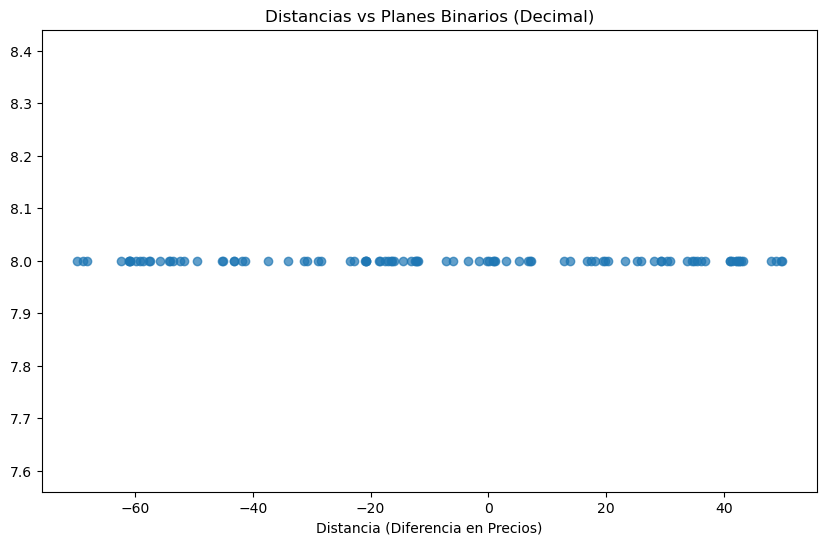

In [133]:
# Validar tamaños de listas
if len(distancias) != len(planes_binarios):
    print("Advertencia: Las listas distancias y planes_binarios no tienen el mismo tamaño.")
    print(f"Distancias: {len(distancias)}, Planes binarios: {len(planes_binarios)}")

# Graficar si las listas son válidas
if len(distancias) == len(planes_binarios):
    plt.figure(figsize=(10, 6))
    plt.scatter(distancias, mi_lista_mapeada, alpha=0.7)
    plt.title("Distancias vs Planes Binarios (Decimal)")
    plt.xlabel("Distancia (Diferencia en Precios)")
    plt.ylabel